In [31]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded NYC dataset
nyc = pd.read_parquet("../data/train_NYC_inspection.parquet")

# Show first entries to confirm structure
nyc.head()

,CUISINE DESCRIPTION,BORO,ZIPCODE,Latitude,Longitude,INSPECTION DATE,BUILDING,STREET,SCORE,GRADE
0,Chinese,Queens,11354.0,40.759778,-73.829235,2024-08-05,136-20,ROOSEVELT AVENUE,9.0,A
1,Coffee/Tea,Queens,11362.0,40.769834,-73.736180,2025-10-31,25201,NORTHERN BLVD,9.0,A
2,Japanese,Manhattan,10036.0,40.759161,-73.990369,2025-05-02,354,WEST 44 STREET,14.0,B
3,Pizza,Queens,11372.0,40.756245,-73.878681,2025-04-15,8906,NORTHERN BLVD,40.0,C
4,Chicken,Queens,11432.0,40.708211,-73.803110,2024-02-29,87-44,PARSONS BOULEVARD,20.0,None


In [22]:
# Inspect the dimensions of the data
nyc.shape

(134028, 10)

In [23]:
# Display information about each column
# This helps identify missing values, column types, and potential issues
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134028 entries, 0 to 134027
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CUISINE DESCRIPTION  134028 non-null  object        
 1   BORO                 134028 non-null  object        
 2   ZIPCODE              132697 non-null  float64       
 3   Latitude             133780 non-null  float64       
 4   Longitude            133780 non-null  float64       
 5   INSPECTION DATE      134028 non-null  datetime64[ns]
 6   BUILDING             133670 non-null  object        
 7   STREET               134028 non-null  object        
 8   SCORE                127900 non-null  float64       
 9   GRADE                68423 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 10.2+ MB


In [24]:
# Summary statistics for all numeric variables
nyc.describe(include="all")

,CUISINE DESCRIPTION,BORO,ZIPCODE,Latitude,Longitude,INSPECTION DATE,BUILDING,STREET,SCORE,GRADE
count,134028,134028,132697.000000,133780.000000,133780.000000,134028,133670,134028,127900.000000,68423
unique,88,5,NaN,NaN,NaN,NaN,7597,2198,NaN,6
top,American,Manhattan,NaN,NaN,NaN,NaN,1,BROADWAY,NaN,A
freq,20121,48305,NaN,NaN,NaN,NaN,655,5371,NaN,43081
mean,NaN,NaN,10717.513795,40.352740,-73.254819,2024-12-18 23:32:31.007252480,NaN,NaN,26.823769,NaN
min,NaN,NaN,10000.000000,0.000000,-74.248708,2024-01-02 00:00:00,NaN,NaN,0.000000,NaN
25%,NaN,NaN,10024.000000,40.687420,-73.988225,2024-07-09 00:00:00,NaN,NaN,12.000000,NaN
50%,NaN,NaN,11101.000000,40.734002,-73.953761,2024-12-17 00:00:00,NaN,NaN,23.000000,NaN
75%,NaN,NaN,11233.000000,40.761837,-73.891174,2025-06-04 00:00:00,NaN,NaN,35.000000,NaN
max,NaN,NaN,11697.000000,40.912822,0.000000,2025-11-08 00:00:00,NaN,NaN,203.000000,NaN


In [25]:
# Count missing values to understand data quality issues
nyc.isna().sum().sort_values(ascending=False)

GRADE                  65605
SCORE                   6128
ZIPCODE                 1331
BUILDING                 358
Latitude                 248
Longitude                248
CUISINE DESCRIPTION        0
BORO                       0
INSPECTION DATE            0
STREET                     0
dtype: int64

## Categorical Varibles Analysis

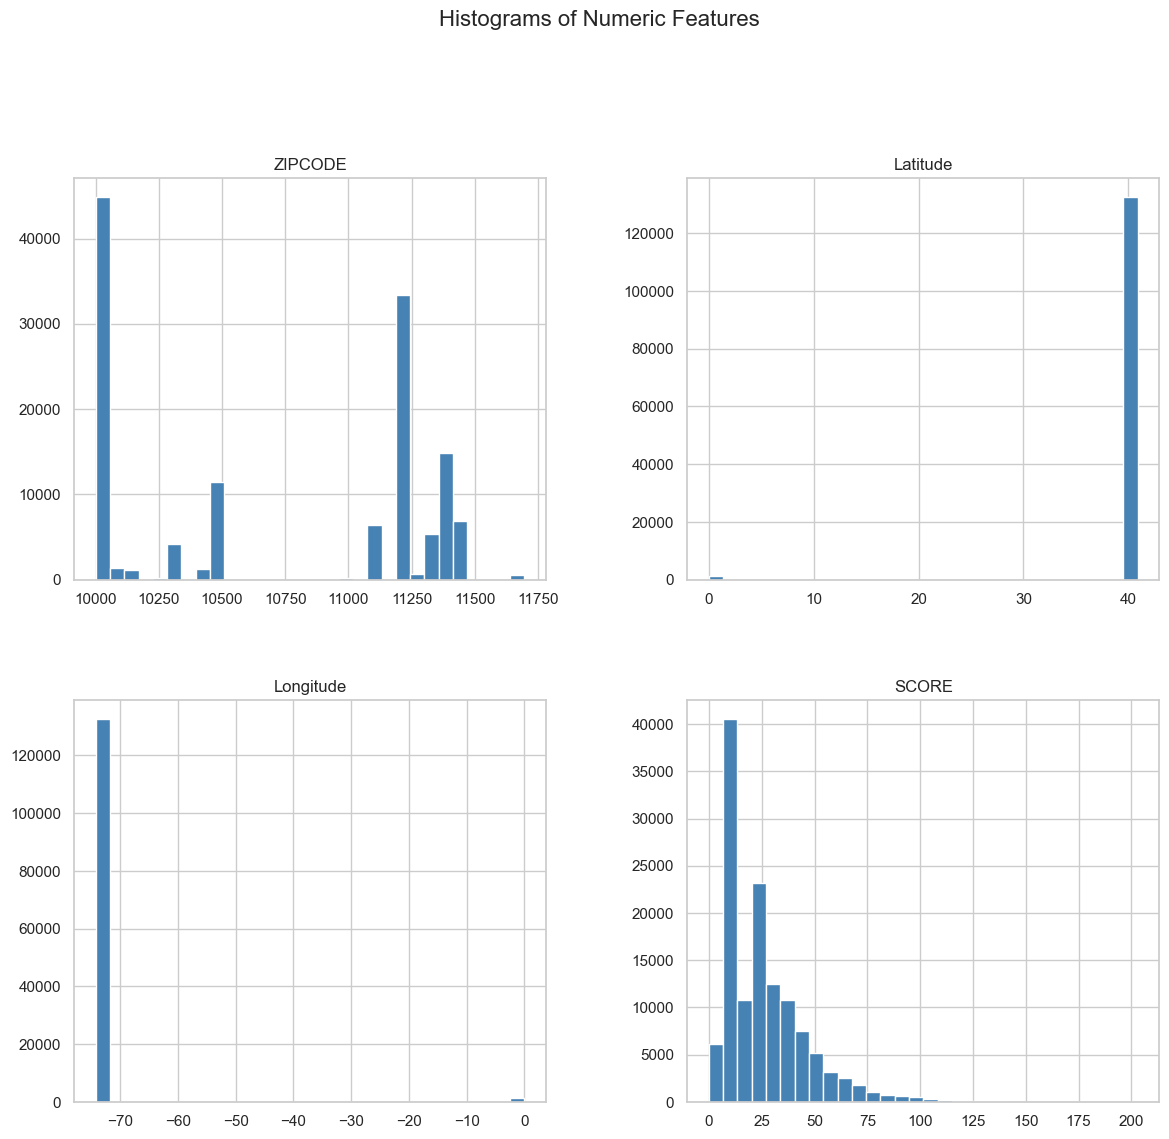

In [ ]:
# Select numeric columns for visualization
numeric_cols = nyc.select_dtypes(include=[np.number]).columns

# Visualize distributions of numeric variables. This helps see skewness, extreme values, and general shapes
nyc[numeric_cols].hist(figsize=(14, 12), bins=30, color="steelblue")
plt.suptitle("Histograms of Numeric Features", y=1.02, fontsize=16)
plt.show()

'''
These histograms give a quick overview of how the numeric features in the NYC inspection dataset are distributed. 
They allow us to spot skewed variables, unusual patterns, and potential outliers that may need preprocessing before modeling. 
Visualizing all numeric columns at once also helps identify which features have meaningful variation versus those that may add little value.

'''

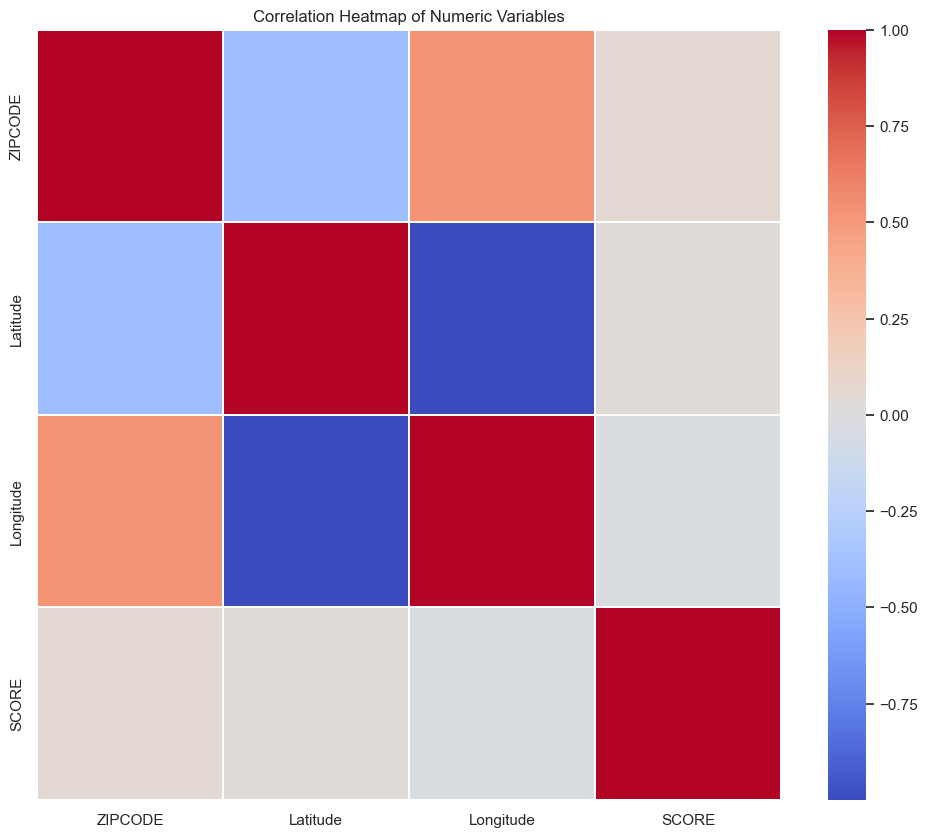

In [ ]:
# Correlation matrix to identify relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(
    nyc[numeric_cols].corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.2
)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

'''
This heatmap visualizes the correlations between all numeric features in the dataset. 
It helps identify strong positive or negative relationships, showing which variables move together or in opposite directions. 
This is useful for spotting redundancy in predictors and understanding which features may influence each other in a regression or classification model.
'''

## Categorical Varibles Analysis

In [28]:
# Identify categorical columns
cat_cols = nyc.select_dtypes(include=["object"]).columns
cat_cols

Index(['CUISINE DESCRIPTION', 'BORO', 'BUILDING', 'STREET', 'GRADE'], dtype='object')

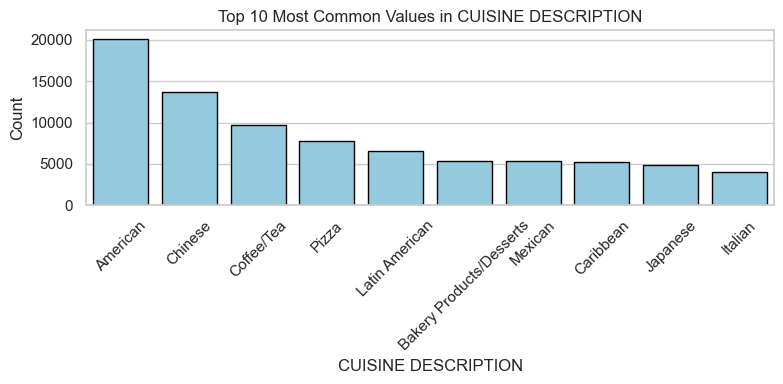

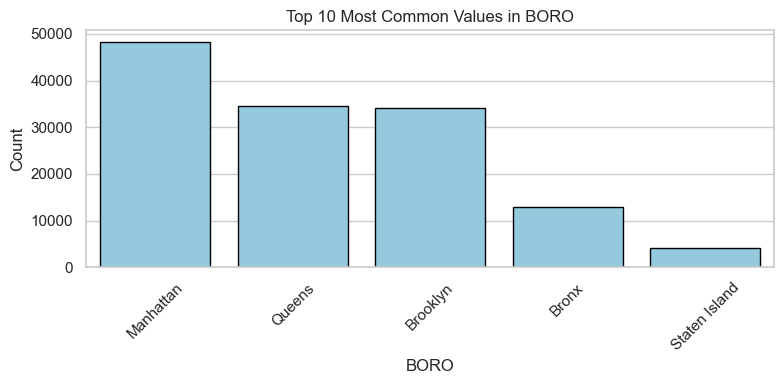

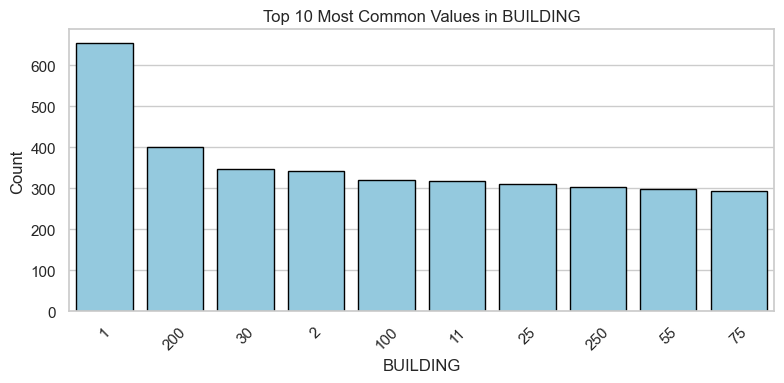

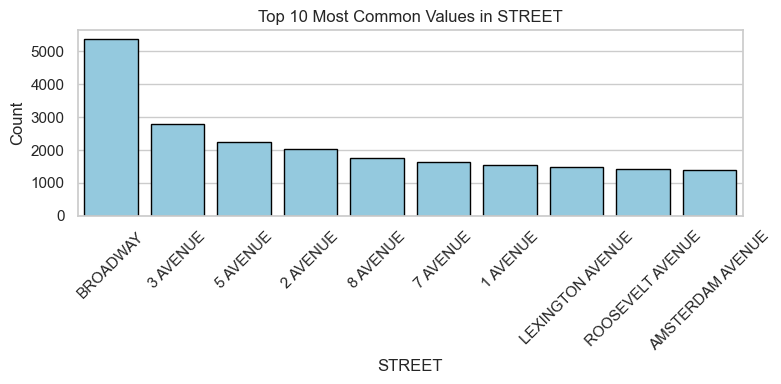

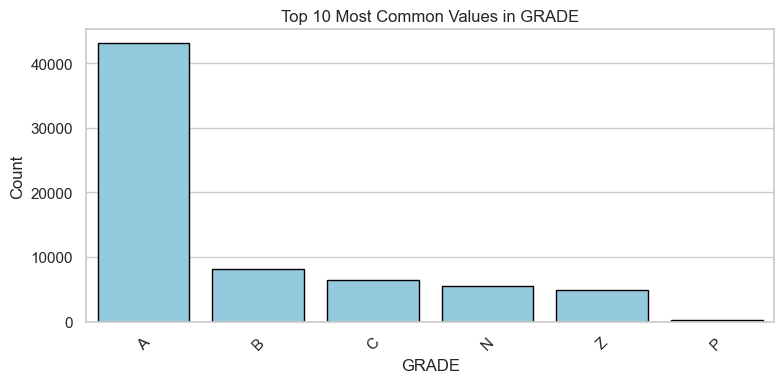

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    
    # Get top 10 categories for this column
    top10 = nyc[col].value_counts().head(10)
    
    # Bar plot without palette 
    sns.barplot(
        x=top10.index,
        y=top10.values,
        color="skyblue",   
        edgecolor="black"
    )
    
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

'''
This code creates bar plots for each categorical variable by displaying the top 10 most frequent categories in that column. 
This helps highlight which values dominate each feature and whether the distribution is balanced or heavily skewed. 
These visual summaries make it easier to spot common patterns across the dataset and identify columns that may need preprocessing before modeling.
'''

## Relationships between target and predictors

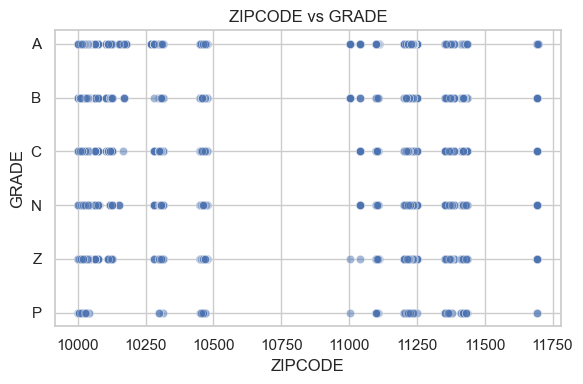

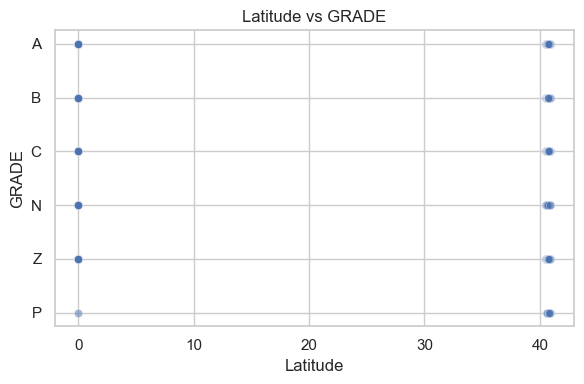

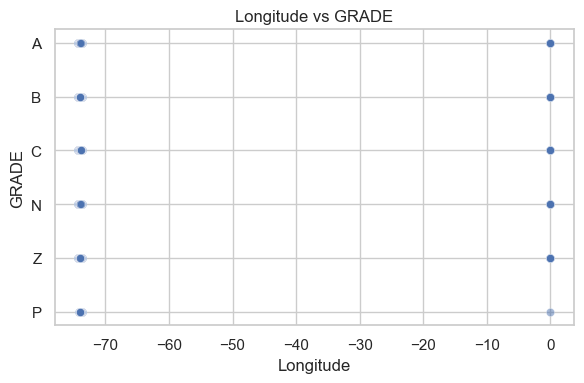

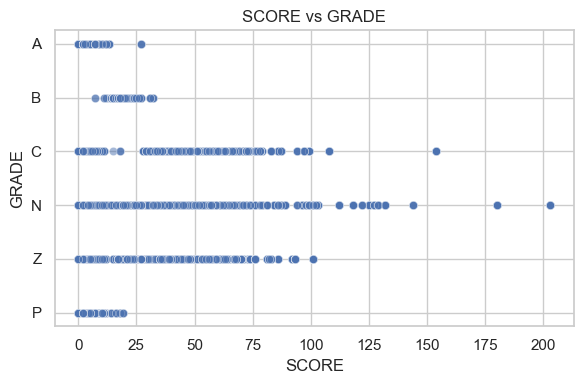

In [ ]:
target = "GRADE"

# Scatterplots of numeric features vs target if target is continuous
for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=nyc, x=col, y=target, alpha=0.5)
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        plt.show()

'''These scatterplots examine the relationship between each numeric feature and the target variable GRADE. 
Visualizing feature–target pairs helps reveal patterns such as linear trends, clusters, or potential outliers that might influence model performance. 
Although GRADE is categorical, these plots still give a basic sense of how feature values differ across grade levels, which can guide feature selection and preprocessing decisions.'''

## Outlier Exploration

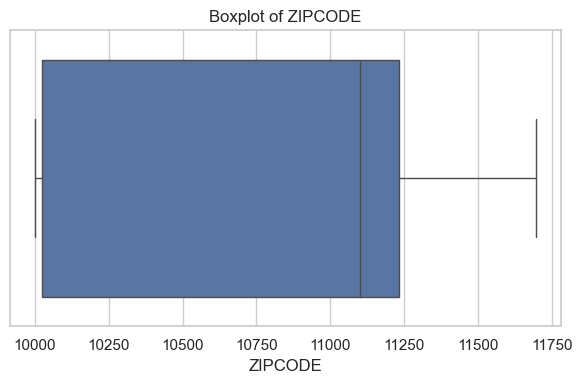

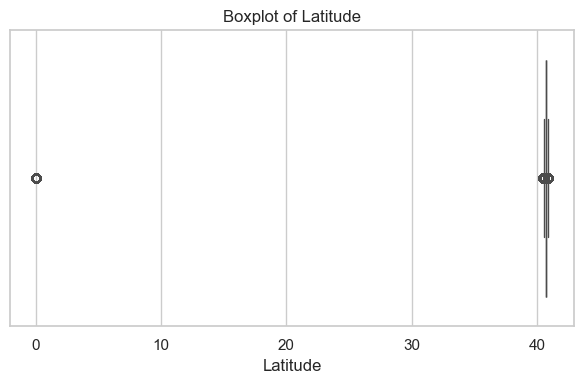

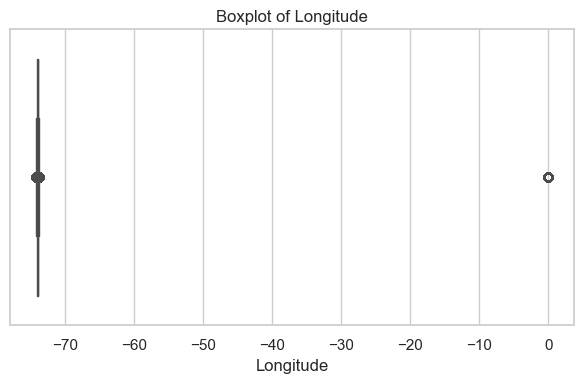

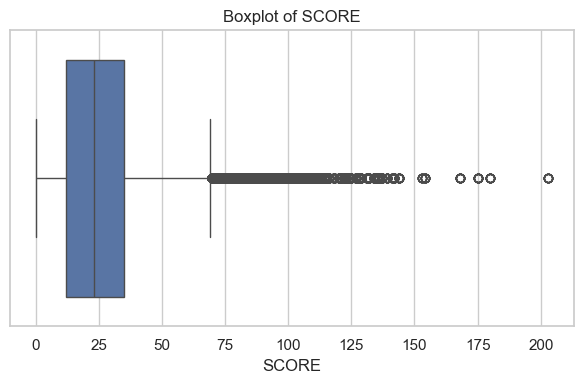

In [ ]:
# Simple outlier check using boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=nyc[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

'''
This code uses boxplots to visualize the distribution of each numeric feature and quickly identify potential outliers. 
Boxplots highlight the median, quartiles, and extreme values, making it easier to spot skewed variables or unusually large deviations. 
This helps determine whether certain features may need transformation or special handling before modeling.
'''

## Summary of Descriptive Analysis

The dataset was previewed to understand its structure, variable types, and overall shape. Summary statistics revealed the central tendencies and variability of each numeric feature. Several variables exhibit skewness, which is common in real-world datasets. Missing values were identified where present, which helps guide future cleaning steps.

Visual analysis showed the general distributions of numeric variables and highlighted potential outliers. The correlation heatmap revealed clusters of related features, offering initial insight into which variables may be redundant or highly predictive. For categorical variables, count plots gave a clear view of the distribution of classes and possible imbalances.

Scatterplots and boxplots offered an early look at how the outcome relates to other features. These findings can guide modeling decisions such as scaling, encoding, outlier handling, and feature selection.